In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.sparse.linalg import svds


def recommend_films(user_id, ratings_matrix, top_n=5):
    recommended_id = ratings_matrix.sort_values(by=user_id, axis=0, ascending=False).index[:top_n]

    file_path = 'movies.csv'
    df = pd.read_csv(file_path)
    
    recommended_movies = df[df['movieId'].isin(recommended_id)]
    recommended_movies = recommended_movies[['title', 'genres']]
    
    return recommended_movies


def SVD(matrix):
    S_right = np.dot(matrix.T, matrix)
    S_left = np.dot(matrix, matrix.T)

    values_right, V = np.linalg.eigh(S_right)
    values_left, U = np.linalg.eigh(S_left)

    index_right = np.argsort(values_right)[::-1]
    index_left = np.argsort(values_left)[::-1]
    values_right = values_right[index_right]
    values_left = values_left[index_left]
    U = U[:, index_left]
    V = V[:, index_right]
    
    singular_values = np.sqrt(values_right)

    S = np.zeros(matrix.shape)
    np.fill_diagonal(S, singular_values)

    reconstructed_matrix = np.dot(U, np.dot(S, V.T))

    return U, S, V.T, reconstructed_matrix


A = np.array([[-1, 3, 1], [3, 4, 1]])
U, S, Vt, A_rec = SVD(A)
U, S, Vt, A_rec

(array([[ 0.4472136 , -0.89442719],
        [ 0.89442719,  0.4472136 ]]),
 array([[5.56776436, 0.        , 0.        ],
        [0.        , 2.44948974, 0.        ]]),
 array([[-0.40160966, -0.88354126, -0.2409658 ],
        [-0.91287093,  0.36514837,  0.18257419],
        [ 0.07332356, -0.29329423,  0.95320625]]),
 array([[ 1., -3., -1.],
        [-3., -4., -1.]]))

In [2]:
file_path = 'ratings.csv'
df = pd.read_csv(file_path)

ratings_matrix = df.pivot(index='userId', columns='movieId', values='rating')

In [3]:
ratings_matrix = ratings_matrix.dropna(thresh=25, axis=0)

In [4]:
ratings_matrix = ratings_matrix.dropna(thresh=25, axis=1)
display(ratings_matrix)

movieId,1,2,3,5,6,7,10,11,16,17,...,122900,122904,122918,134130,134853,139385,148626,152081,164179,166528
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,NaN,NaN,2.5,NaN,2.5,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2.5,2.0,2.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
ratings_matrix_filled = ratings_matrix.fillna(2.5)
R = ratings_matrix_filled.values
user_ratings_mean = np.mean(R, axis=1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)

In [6]:
U, sigma, Vt = svds(R_demeaned, k=3)

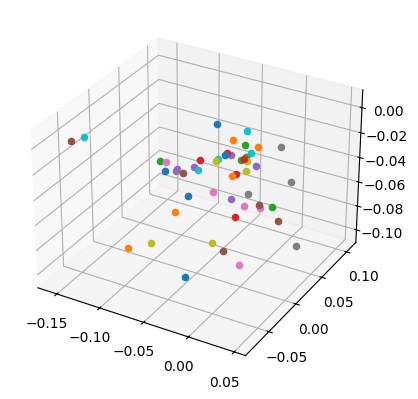

In [7]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
for i in range(0,50):
    ax.scatter(U[i,0], U[i,1], U[i,2])
plt.show()

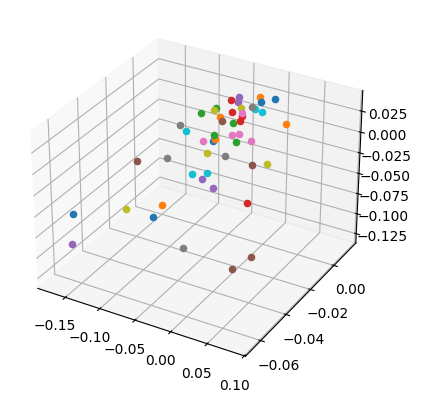

In [8]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
for i in range(0,50):
    ax.scatter(Vt[0,i], Vt[1,i], Vt[2,i])
plt.show()

In [22]:
U, sigma, Vt = svds(R_demeaned, k=3)
sigma = np.diag(sigma)

In [23]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)
preds_df = pd.DataFrame(all_user_predicted_ratings, columns=ratings_matrix.columns, index=ratings_matrix.index)
display(preds_df)

movieId,1,2,3,5,6,7,10,11,16,17,...,122900,122904,122918,134130,134853,139385,148626,152081,164179,166528
userId,,,,,,,,,,,,,,,,,,,,,
1,3.769635,2.862664,2.781127,2.629306,3.290451,2.695103,3.042549,3.027469,3.043577,3.010539,...,2.508489,2.395712,2.493511,2.534881,2.512647,2.526788,2.534251,2.466400,2.523896,2.504742
2,2.521409,2.526634,2.464712,2.483303,2.510108,2.474562,2.514618,2.440197,2.543234,2.453734,...,2.566611,2.643784,2.567838,2.613011,2.601465,2.589404,2.563860,2.586097,2.563278,2.583785
3,2.458539,2.482138,2.475266,2.481611,2.467589,2.478867,2.475953,2.466700,2.477119,2.467309,...,2.494497,2.507254,2.495061,2.499405,2.498659,2.496497,2.492965,2.498036,2.493367,2.496864
4,2.791309,2.467967,2.612533,2.524035,2.789753,2.554518,2.555378,2.654937,2.750412,2.776932,...,2.453601,2.313503,2.444228,2.437830,2.428861,2.473533,2.515560,2.415946,2.492594,2.423534
5,2.984699,2.721347,2.615309,2.581144,2.709603,2.603864,2.765648,2.755299,2.556279,2.618896,...,2.472412,2.438687,2.470342,2.447377,2.455757,2.438374,2.435385,2.457716,2.450528,2.476823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,3.351851,2.554860,2.633179,2.494245,3.287609,2.531842,2.721263,2.632890,3.334276,2.996338,...,2.692253,2.689871,2.674220,2.862619,2.787914,2.844750,2.834164,2.685721,2.774332,2.694903
607,3.567244,2.921514,2.753275,2.658729,3.046601,2.710110,3.038840,3.018221,2.764146,2.833320,...,2.477927,2.398418,2.470297,2.454905,2.458302,2.439737,2.437567,2.445223,2.454087,2.482968
608,3.482992,2.872373,2.578294,2.549542,3.154815,2.555753,2.948686,2.614866,3.160992,2.716435,...,2.860130,3.119555,2.854100,3.095125,3.022948,2.988878,2.884408,2.917042,2.867153,2.930420


In [24]:
preds_df[ratings_matrix.notna()] = np.nan
display(preds_df)

movieId,1,2,3,5,6,7,10,11,16,17,...,122900,122904,122918,134130,134853,139385,148626,152081,164179,166528
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,2.862664,NaN,2.629306,NaN,2.695103,3.042549,3.027469,3.043577,3.010539,...,2.508489,2.395712,2.493511,2.534881,2.512647,2.526788,2.534251,2.466400,2.523896,2.504742
2,2.521409,2.526634,2.464712,2.483303,2.510108,2.474562,2.514618,2.440197,2.543234,2.453734,...,2.566611,2.643784,2.567838,2.613011,2.601465,2.589404,2.563860,2.586097,2.563278,2.583785
3,2.458539,2.482138,2.475266,2.481611,2.467589,2.478867,2.475953,2.466700,2.477119,2.467309,...,2.494497,2.507254,2.495061,2.499405,2.498659,2.496497,2.492965,2.498036,2.493367,2.496864
4,2.791309,2.467967,2.612533,2.524035,2.789753,2.554518,2.555378,2.654937,2.750412,2.776932,...,2.453601,2.313503,2.444228,2.437830,2.428861,2.473533,2.515560,2.415946,2.492594,2.423534
5,NaN,2.721347,2.615309,2.581144,2.709603,2.603864,2.765648,2.755299,2.556279,2.618896,...,2.472412,2.438687,2.470342,2.447377,2.455757,2.438374,2.435385,2.457716,2.450528,2.476823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,2.554860,2.633179,2.494245,3.287609,NaN,2.721263,NaN,3.334276,NaN,...,2.692253,2.689871,2.674220,2.862619,2.787914,2.844750,2.834164,2.685721,2.774332,2.694903
607,NaN,2.921514,2.753275,2.658729,3.046601,2.710110,3.038840,NaN,2.764146,2.833320,...,2.477927,2.398418,2.470297,2.454905,2.458302,2.439737,2.437567,2.445223,2.454087,2.482968
608,NaN,NaN,NaN,2.549542,3.154815,2.555753,NaN,2.614866,NaN,2.716435,...,2.860130,3.119555,2.854100,3.095125,3.022948,2.988878,2.884408,2.917042,2.867153,2.930420


In [21]:
print(recommend_films(10, preds_df, 5))

                                      title  \
41                        To Die For (1995)   
205                   Goofy Movie, A (1995)   
213                 Immortal Beloved (1994)   
349                   Street Fighter (1994)   
511  Snow White and the Seven Dwarfs (1937)   

                                       genres  
41                      Comedy|Drama|Thriller  
205         Animation|Children|Comedy|Romance  
213                             Drama|Romance  
349                  Action|Adventure|Fantasy  
511  Animation|Children|Drama|Fantasy|Musical  
